In [1]:
import torch
from transformers import AutoModelForMaskedLM, AutoTokenizer

In [39]:
import numpy as np
import pandas as pd

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
model = AutoModelForMaskedLM.from_pretrained("distilbert-base-uncased")
model.eval()

DistilBertForMaskedLM(
  (activation): GELUActivation()
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0): TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inp

In [8]:
df = pd.read_csv("data/masked_s_gold_BUG.csv")

In [20]:
df["text"].head(2).values

array(['Among them was the president [MASK] .',
       'Results In the pre - COVID era , an average aesthetic surgeon was finely balancing [MASK] profession , personal lifestyle , learning , and recreation .'],
      dtype=object)

In [51]:
df = pd.read_csv("data/s_gold_BUG.csv")
df[df["uid"] == 542]

,Unnamed: 0,index,uid,sentence_text,tokens,profession,g,profession_first_index,g_first_index,predicted gender,stereotype,distance,num_of_pronouns,corpus,data_index
164,164,541,542,His outstanding achievement of the use of flux...,"['His', 'outstanding', 'achievement', 'of', 't...",physician,His,31,0,Male,1,29,1,pubmed,17


In [13]:
df_result = pd.read_csv("data/vanilla_bert_prediction.csv", index_col=0)
df_result.head(5)

,sentences,stereo_prob,anti-stereo_prob
0,among them was the president [MASK] .,0.981314,0.018686
1,"results in the pre-covid era , an average aest...",0.729570,0.270430
2,peter ( b23 ) is a musician and music editor w...,0.952918,0.047082
3,we use genetic data from this child and [MASK]...,0.487575,0.512425
4,these two might not have any social contact in...,0.444676,0.555324


In [14]:
df_result.describe()

,stereo_prob,anti-stereo_prob
count,547.000000,547.000000
mean,0.840317,0.159683
std,0.207059,0.207059
min,0.067273,0.000099
25%,0.782421,0.018454
50%,0.925925,0.074075
75%,0.981546,0.217579
max,0.999901,0.932727


In [69]:
stereotyped = df_result[df_result["stereo_prob"] > df_result["anti-stereo_prob"]]["sentences"].count()

In [70]:
print("steretyped predictions", stereotyped)
print("total predictions: ", df_result.shape[0])

steretyped predictions 501
total predictions:  547


In [78]:
df_result[df_result["stereo_prob"] < df_result["anti-stereo_prob"]]

,sentences,stereo_prob,anti-stereo_prob
3,we use genetic data from this child and [MASK]...,0.487575,0.512425
4,these two might not have any social contact in...,0.444676,0.555324
5,the author declares that [MASK] has no conflic...,0.254677,0.745323
18,teachers that select appropriate literature fo...,0.410255,0.589745
46,a second case was adjudicated in chile in 2012...,0.281166,0.718834
61,when the author published [MASK] early studies...,0.154956,0.845044
66,the person addressed is commended for [MASK] p...,0.108664,0.891336
75,"dr elspeth king , writer and curator , was bor...",0.335645,0.664355
79,"in 1978 , the tmpd was investigated when a uni...",0.297132,0.702868
89,"if , for example , a person sincerely declares...",0.099523,0.900477


In [82]:
'''
investigate predictions that are anti-stereo
1. sentence lengths influence?
2. author
'''
anti_sent_len = []
for sent in df_result[df_result["stereo_prob"] < df_result["anti-stereo_prob"]]["sentences"].values:
    tokens = tokenizer.tokenize(sent)
    anti_sent_len.append(len(tokens))

stereo_sent_len = []
for sent in df_result[df_result["stereo_prob"] > df_result["anti-stereo_prob"]]["sentences"].values:
    tokens = tokenizer.tokenize(sent)
    stereo_sent_len.append(len(tokens))

In [83]:
print(sum(anti_sent_len) / len(anti_sent_len))
print(sum(stereo_sent_len) / len(stereo_sent_len))

33.08695652173913
33.26946107784431


### Finetuned on Gold (prediction Gold)

In [7]:
df_finetuned = pd.read_csv("data/finetuned_bert_prediction.csv", index_col=0)
df_finetuned.head(5)

,sentences,stereo_prob,anti-stereo_prob
0,among them was the president [MASK] .,0.984665,0.015335
1,"results in the pre-covid era , an average aest...",0.891770,0.108230
2,peter ( b23 ) is a musician and music editor w...,0.987124,0.012876
3,we use genetic data from this child and [MASK]...,0.559851,0.440149
4,these two might not have any social contact in...,0.259128,0.740872


In [9]:
df_finetuned.describe()

,stereo_prob,anti-stereo_prob
count,547.000000,547.000000
mean,0.834679,0.165321
std,0.223001,0.223001
min,0.016653,0.000060
25%,0.777271,0.016416
50%,0.936743,0.063257
75%,0.983584,0.222729
max,0.999940,0.983347


In [12]:
df_finetuned[df_finetuned["stereo_prob"] > df_finetuned["anti-stereo_prob"]].shape

(490, 3)

### Finetuned on Full (prediction Gold)

In [42]:
df_finetuned_fg = pd.read_csv("data/finetuned_bert_prediction_gold.csv", index_col=0)
df_finetuned_fg.describe().round(4)

,stereo_prob,anti-stereo_prob
count,547.0000,547.0000
mean,0.1532,0.8468
std,0.3182,0.3182
min,0.0000,0.0000
25%,0.0000,0.9625
50%,0.0006,0.9994
75%,0.0375,1.0000
max,1.0000,1.0000


In [51]:
df_finetuned_fg[df_finetuned_fg["stereo_prob"] > df_finetuned_fg["anti-stereo_prob"]].shape

(81, 3)

In [52]:
df_finetuned_fg = pd.read_csv("data/attention/intervene_bert_prediction_gold.csv", index_col=0)
df_finetuned_fg.describe()
df_finetuned_fg[df_finetuned_fg["stereo_prob"] > df_finetuned_fg["anti-stereo_prob"]].shape

(86, 3)

### Finetuned on Full (prediction FUll)

In [46]:
df_finetuned_ff = pd.read_csv("data/finetuned_bert_prediction_full.csv", index_col=0)
df_finetuned_ff.describe().round(4)

,stereo_prob,anti-stereo_prob
count,31227.0000,31227.0000
mean,0.1586,0.8414
std,0.3288,0.3288
min,0.0000,0.0000
25%,0.0000,0.9629
50%,0.0004,0.9996
75%,0.0371,1.0000
max,1.0000,1.0000


### layer 1 (prediction Gold)

In [53]:
pd.read_csv("data/attention/attention_bert_prediction_gold_0.csv", index_col=0).describe()

,stereo_prob,anti-stereo_prob
count,547.000000,547.000000
mean,0.836821,0.163179
std,0.221968,0.221968
min,0.040832,0.000085
25%,0.783666,0.017186
50%,0.932611,0.067389
75%,0.982814,0.216334
max,0.999915,0.959168


In [54]:
pd.read_csv("data/attention/attention_bert_prediction_gold_1.csv", index_col=0).describe()

,stereo_prob,anti-stereo_prob
count,547.000000,547.000000
mean,0.834364,0.165636
std,0.214807,0.214807
min,0.039864,0.000105
25%,0.778598,0.019024
50%,0.923669,0.076331
75%,0.980976,0.221402
max,0.999895,0.960136


In [55]:
pd.read_csv("data/attention/attention_bert_prediction_gold_2.csv", index_col=0).describe()

,stereo_prob,anti-stereo_prob
count,547.000000,547.000000
mean,0.832015,0.167985
std,0.226769,0.226769
min,0.029152,0.000126
25%,0.785159,0.018415
50%,0.928330,0.071670
75%,0.981585,0.214841
max,0.999874,0.970848


In [56]:
pd.read_csv("data/attention/attention_bert_prediction_gold_3.csv", index_col=0).describe()

,stereo_prob,anti-stereo_prob
count,547.000000,547.000000
mean,0.816065,0.183935
std,0.229786,0.229786
min,0.028045,0.000060
25%,0.732196,0.019285
50%,0.917013,0.082987
75%,0.980715,0.267804
max,0.999940,0.971955


In [57]:
pd.read_csv("data/attention/attention_bert_prediction_gold_4.csv", index_col=0).describe()

,stereo_prob,anti-stereo_prob
count,547.000000,547.000000
mean,0.627390,0.372610
std,0.335629,0.335629
min,0.001294,0.000073
25%,0.287467,0.053221
50%,0.734399,0.265601
75%,0.946779,0.712533
max,0.999927,0.998706


In [58]:
pd.read_csv("data/attention/attention_bert_prediction_gold_5.csv", index_col=0).describe()

,stereo_prob,anti-stereo_prob
count,547.000000,547.000000
mean,0.839899,0.160101
std,0.237840,0.237840
min,0.011371,0.000031
25%,0.796610,0.010195
50%,0.951535,0.048465
75%,0.989805,0.203390
max,0.999969,0.988629


### accumulative (prediction Gold)

In [59]:
pd.read_csv("data/attention/accum_bert_prediction_gold_0.csv", index_col=0).describe()

,stereo_prob,anti-stereo_prob
count,547.000000,547.000000
mean,0.836821,0.163179
std,0.221968,0.221968
min,0.040832,0.000085
25%,0.783666,0.017186
50%,0.932611,0.067389
75%,0.982814,0.216334
max,0.999915,0.959168


In [63]:
pd.read_csv("data/attention/accum_bert_prediction_gold_1.csv", index_col=0).describe()

,stereo_prob,anti-stereo_prob
count,547.000000,547.000000
mean,0.823144,0.176856
std,0.238034,0.238034
min,0.010115,0.000081
25%,0.764957,0.018400
50%,0.929685,0.070315
75%,0.981600,0.235043
max,0.999919,0.989885


In [64]:
pd.read_csv("data/attention/accum_bert_prediction_gold_2.csv", index_col=0).describe()

,stereo_prob,anti-stereo_prob
count,547.000000,547.000000
mean,0.782861,0.217139
std,0.282629,0.282629
min,0.001497,0.000063
25%,0.685543,0.019394
50%,0.922181,0.077819
75%,0.980606,0.314457
max,0.999937,0.998503


In [65]:
pd.read_csv("data/attention/accum_bert_prediction_gold_3.csv", index_col=0).describe()

,stereo_prob,anti-stereo_prob
count,547.000000,547.000000
mean,0.645345,0.354655
std,0.350022,0.350022
min,0.000257,0.000026
25%,0.330992,0.032813
50%,0.786659,0.213341
75%,0.967187,0.669008
max,0.999974,0.999743


In [66]:
pd.read_csv("data/attention/accum_bert_prediction_gold_4.csv", index_col=0).describe()

,stereo_prob,anti-stereo_prob
count,547.000000,547.000000
mean,0.208768,0.791232
std,0.325890,0.325890
min,0.000006,0.000016
25%,0.001928,0.726220
50%,0.024544,0.975456
75%,0.273780,0.998072
max,0.999984,0.999994


In [86]:
pd.read_csv("data/attention/accum_bert_prediction_gold_5.csv", index_col=0).describe().round(5)

,stereo_prob,anti-stereo_prob
count,547.00000,547.00000
mean,0.16057,0.83943
std,0.32481,0.32481
min,0.00000,0.00000
25%,0.00003,0.95260
50%,0.00074,0.99926
75%,0.04740,0.99997
max,1.00000,1.00000


In [91]:
np.arange(0,1,0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

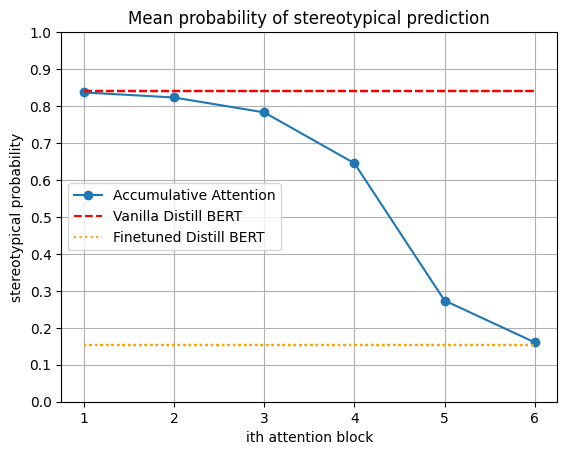

In [103]:
# line plot 
probs = [0.836821, 0.823144, 0.782861, 0.645345, 0.273780, 0.16057]
plt.grid()
plt.plot(list(range(1,7)), probs, marker='o', label="Accumulative Attention")
plt.hlines([0.840317]*6, xmin=1, xmax=6,linestyles="dashed", label="Vanilla Distill BERT", colors="red")
plt.hlines([0.1532] * 6, xmin=1, xmax=6, linestyles="dotted", label="Finetuned Distill BERT", colors="orange")
plt.xlabel("ith attention block")
plt.ylabel("stereotypical probability")
plt.title("Mean probability of stereotypical prediction")
plt.legend(loc="center left")
plt.yticks(np.arange(0,1.1,0.1))
plt.savefig("images/distill_accum_prob.png")

### BERT (prediction Gold)

In [71]:
pd.read_csv("data/vanilla_real_bert_prediction.csv", index_col=0).describe().round(4)

,stereo_prob,anti-stereo_prob
count,547.0000,547.0000
mean,0.8945,0.1055
std,0.1993,0.1993
min,0.0082,0.0000
25%,0.9027,0.0022
50%,0.9814,0.0186
75%,0.9978,0.0973
max,1.0000,0.9918


In [105]:
df_bert_gold = pd.read_csv("data/vanilla_real_bert_prediction.csv", index_col=0)
df_bert_gold[df_bert_gold["stereo_prob"] > df_bert_gold["anti-stereo_prob"]].shape

(510, 3)

### BERT (prediction Full)

In [72]:
pd.read_csv("data/vanilla_real_bert_prediction_full.csv", index_col=0).describe().round(4)

,stereo_prob,anti-stereo_prob
count,31227.0000,31227.0000
mean,0.8815,0.1185
std,0.2168,0.2168
min,0.0005,0.0000
25%,0.8855,0.0024
50%,0.9812,0.0188
75%,0.9976,0.1145
max,1.0000,0.9995


### Finetuned BERT on Gold 

In [109]:
df = pd.read_csv("data/real_bert_prediction/finetuned_real_bert_prediction_gold.csv", index_col=0)
df.describe().round(4)

,stereo_prob,anti-stereo_prob
count,547.0000,547.0000
mean,0.8738,0.1262
std,0.2491,0.2491
min,0.0002,0.0000
25%,0.9004,0.0007
50%,0.9920,0.0080
75%,0.9993,0.0996
max,1.0000,0.9998


In [110]:
df[df["stereo_prob"] > df["anti-stereo_prob"]].shape

(489, 3)

### Finetuned BERT on Full

In [113]:
df = pd.read_csv("data/real_bert_prediction/finetuned_real_bert_prediction_full.csv", index_col=0)
df.describe().round(4)

,stereo_prob,anti-stereo_prob
count,547.0000,547.0000
mean,0.2818,0.7182
std,0.3960,0.3960
min,0.0000,0.0000
25%,0.0001,0.3663
50%,0.0134,0.9866
75%,0.6337,0.9999
max,1.0000,1.0000


In [114]:
df[df["stereo_prob"] > df["anti-stereo_prob"]].shape

(155, 3)